## **Data Generation**

In [ ]:
import pandas as pd
import numpy as np
!pip install faker
from faker import Faker
import random

# Initialize Faker
fake = Faker()

# Number of records for the sample
num_records = 1800

# Function to generate a list of fake names
def generate_names(n):
    return [fake.name() for _ in range(n)]

# Function to generate a list of fake addresses
def generate_addresses(n):
    return [fake.address().replace("\n", ", ") for _ in range(n)]

# Function to generate a list of fake emails
def generate_emails(n):
    return [fake.email() for _ in range(n)]

# Function to generate a list of fake phone numbers
def generate_phones(n):
    return [fake.phone_number() for _ in range(n)]

# Generate Personal Identifiers
personal_identifiers = pd.DataFrame({
    'Name': generate_names(num_records),
    'Email': generate_emails(num_records),
    'Phone': generate_phones(num_records)
})

# Generate ratios for demographics
def generate_demographic_weights(n):
    boundaries = sorted(random.random() for _ in range(n-1))
    boundaries = [0] + boundaries + [1]
    weights = [boundaries[i + 1] - boundaries[i] for i in range(n)]
    return weights

# Generate sample income data for a given distribution and range
def generate_income_data(n, possible_distributions, mean_range, std_range):
    distribution = random.choice(possible_distributions)
    mean = random.uniform(*mean_range)
    std = random.uniform(*std_range)

    if distribution == 'normal':
        data = np.random.normal(mean, std, n)
    elif distribution == 'bimodal':
        mean2 = random.uniform(*mean_range)
        std2 = random.uniform(*std_range)
        data = np.concatenate([np.random.normal(mean, std, n // 2), np.random.normal(mean2, std2, n - n // 2)])
    elif distribution == 'lognormal':
        # Convert mean and std of the normal distribution to the scale of the lognormal distribution
        mu = np.log(mean**2 / np.sqrt(std**2 + mean**2))
        sigma = np.sqrt(np.log(1 + (std**2 / mean**2)))
        data = np.random.lognormal(mu, sigma, n)

    return data.round().astype(int)

# Race generation settings
race_options = ['White', 'Black or African American', 'American Indian or Alaska Native', 'Asian', 'Native Hawaiian or Other Pacific Islander', 'Two Or More Races']
race_weights = generate_demographic_weights(len(race_options))

# Income generation settings
possible_income_distributions = ['normal', 'bimodal', 'lognormal']
mean_income_range = (20000, 150000)
std_income_range = (5000, 30000)

# Gender generation settings
gender_distribution = {
    'Male': 0.495,
    'Female': 0.495,
    'Non-Binary': 0.01
}

# Generate Demographics
demographics = pd.DataFrame({
    'Race': random.choices(race_options, race_weights, k=num_records),
    'Income': generate_income_data(num_records, possible_income_distributions, mean_income_range, std_income_range),
    'Distance from School': np.random.uniform(0.5, 20.0, num_records).round(2),
    'Gender': random.choices(population=list(gender_distribution.keys()),weights=list(gender_distribution.values()),k=num_records)
})
print(demographics.head())

# Class settings
freshman_classes = [
    "Algebra I",
    "Geometry",
    "Biology",
    "English I",
    "World History",
    "Spanish I",
    "French I",
    "German I",
    "Latin I",
    "Mandarin Chinese I",
    "Art I",
    "Music Theory",
    "Band",
    "Choir",
    "Orchestra",
    "Drama",
    "Physical Education",
    "Health"
]
sophomore_classes = [
    "Algebra II",
    "Geometry",
    "Pre-Calculus",
    "Biology",
    "Chemistry",
    "English II",
    "World History",
    "U.S. History",
    "Spanish II",
    "French II",
    "German II",
    "Latin II",
    "Mandarin Chinese II",
    "Art II",
    "Music Theory",
    "Band",
    "Choir",
    "Orchestra",
    "Drama",
    "Computer Science",
    "Health",
    "Physical Education"
]
junior_classes = [
    "Algebra II",
    "Pre-Calculus",
    "Calculus",
    "Chemistry",
    "Physics",
    "English III",
    "U.S. History",
    "AP U.S. History",
    "Spanish III",
    "French III",
    "AP Spanish Language",
    "AP French Language",
    "AP Art History",
    "AP Music Theory",
    "Band",
    "Choir",
    "Orchestra",
    "Drama",
    "Journalism",
    "Speech and Debate",
    "Computer Science",
    "AP Computer Science A",
    "Business Management",
    "Marketing",
    "Accounting",
    "Entrepreneurship",
    "Physical Education"
]
senior_classes = [
    "Calculus",
    "AP Calculus AB",
    "AP Calculus BC",
    "Statistics",
    "AP Statistics",
    "Physics",
    "AP Physics 1",
    "AP Physics 2",
    "Environmental Science",
    "AP Environmental Science",
    "English IV",
    "AP English Language and Composition",
    "AP English Literature and Composition",
    "Government",
    "AP Government and Politics",
    "Economics",
    "AP Microeconomics",
    "AP Macroeconomics",
    "Psychology",
    "AP Psychology",
    "AP Art History",
    "AP Studio Art",
    "AP Music Theory",
    "Band",
    "Choir",
    "Orchestra",
    "Drama",
    "Film Studies",
    "Creative Writing",
    "Speech and Debate",
    "AP Computer Science Principles",
    "Web Design",
    "Graphic Design",
    "Digital Photography",
    "Culinary Arts",
    "Automotive Technology",
    "Carpentry",
    "Welding",
    "Electrical Technology",
    "Anatomy and Physiology",
    "Sports Medicine",
    "Personal Finance",
    "Law and Justice",
    "Forensic Science",
    "Marine Biology",
    "Astronomy",
    "Geology",
    "AP Human Geography",
    "Philosophy",
    "Ethics",
    "World Religions",
    "Gender Studies",
    "African American Studies",
    "Latin American Studies",
    "Native American Studies",
    "AP Capstone Seminar"
]

# Function to choose class year randomly
def choose_class_year():
    return random.choice(['Freshman', 'Sophomore', 'Junior', 'Senior'])

# Function to generate a list of lists of classes for a student in a given year
# for example, a sophomore should have a list for freshman and sophomore years
def generate_class_lists(class_year):
    if class_year == 'Freshman':
        # Randomly select 6-8 classes from the freshman class list
        return [random.sample(freshman_classes, k=random.randint(6, 8))]
    elif class_year == 'Sophomore':
        # Randomly select 6-8 classes for freshman and sophomore years
        return [random.sample(freshman_classes, k=random.randint(6, 8)),
                random.sample(sophomore_classes, k=random.randint(6, 8))]
    elif class_year == 'Junior':
        # Randomly select 6-8 classes from junior, sophomore, and freshman years
        return [random.sample(freshman_classes, k=random.randint(6, 8)),
                random.sample(sophomore_classes, k=random.randint(6, 8)),
                random.sample(junior_classes, k=random.randint(6, 8))]
    else:  # Randomly select 6-8 classes from senior, junior, sophomore, and freshman years
        return [random.sample(freshman_classes, k=random.randint(6, 8)),
                random.sample(sophomore_classes, k=random.randint(6, 8)),
                random.sample(junior_classes, k=random.randint(6, 8)),
                random.sample(senior_classes, k=random.randint(6, 8))]

def generate_yearly_grades(class_lists):
    """
    Generates grades for a list of classes for each year based on a specified trend and average grade.

    Parameters:
    - class_lists: List of lists of classes taken by the student for each year.

    Returns:
    - yearly_grades: List of lists of grades for each class in each year, following the specified trend and average grade.
    """
    num_years = len(class_lists)
    yearly_grades = []
    trend = random.choice(['improving', 'declining', 'constant'])
    avg_grade = random.randint(60, 100)

    if trend == 'improving':
        # Start with lower grades and gradually increase
        avg_grade_range = np.linspace(avg_grade - 10, avg_grade + 10, num_years)
    elif trend == 'declining':
        # Start with higher grades and gradually decrease
        avg_grade_range = np.linspace(avg_grade + 10, avg_grade - 10, num_years)
    else:  # 'constant'
        # All grades are around the average grade
        avg_grade_range = np.full(num_years, avg_grade)

    # Generate grades for each year
    for i, class_list in enumerate(class_lists):
        year_avg_grade = avg_grade_range[i]
        grades = [min(max(int(year_avg_grade + np.random.uniform(-5, 5)), 0), 100) for _ in class_list]
        yearly_grades.append(grades)

    return yearly_grades

# Function to generate a list of standardized tests taken based on class year,
# allowing for multiple tests to be taken, and the scores for each test
def generate_test_scores(class_year):
    if class_year == 'Freshman':
        # Randomly select 0-2 tests from the freshman test list
        tests = random.sample(['PSAT 8/9', 'ACT Aspire', 'Pre-ACT', 'SAT', 'ACT'], k=random.randint(0, 1))
    elif class_year == 'Sophomore':
        # Randomly select 0-2 tests from the freshman and sophomore test lists
        tests = random.sample(['PSAT 8/9', 'ACT Aspire', 'Pre-ACT', 'SAT', 'ACT', 'PSAT 10'], k=random.randint(0, 2))
    elif class_year == 'Junior':
        # Randomly select 0-2 tests from the junior and sophomore test lists
        tests = random.sample(['PSAT 8/9', 'ACT Aspire', 'Pre-ACT', 'SAT', 'ACT', 'PSAT 10', 'PSAT/NMSQT', 'SAT Subject Tests', 'AP Exams'], k=random.randint(0, 6))
    else:  # Randomly select 0-2 tests from the senior, junior, and sophomore test lists
        tests = random.sample(['PSAT 8/9', 'ACT Aspire', 'Pre-ACT', 'SAT', 'ACT', 'PSAT 10', 'PSAT/NMSQT', 'SAT Subject Tests', 'AP Exams'], k=random.randint(0, 8))

    # Generate scores for each test (normalized to 0-100)
    scores = {test: np.random.randint(60, 100) for test in tests}
    return tests, scores

def generate_infractions(category, class_year):
    if category == 'Well-Behaved':
        return {'Detentions': 0, 'Suspensions': 0, 'Expulsions': 0}
    elif category == 'Occasionally Troubled':
        detention_range = (0, 4) if class_year in ['Freshman', 'Sophomore'] else (1, 5)
        suspension_chance = 0.05 if class_year in ['Freshman', 'Sophomore'] else 0.1
        return {'Detentions': np.random.randint(*detention_range), 'Suspensions': np.random.choice([0, 1], p=[1-suspension_chance, suspension_chance]), 'Expulsions': 0}
    elif category == 'Frequently Troubled':
        detention_range = (3, 11) if class_year in ['Freshman', 'Sophomore'] else (4, 12)
        suspension_chance = [0.7, 0.25, 0.05] if class_year in ['Freshman', 'Sophomore'] else [0.65, 0.25, 0.1]
        expulsion_chance = 0.05 if class_year in ['Junior', 'Senior'] else 0
        return {'Detentions': np.random.randint(*detention_range), 'Suspensions': np.random.choice([0, 1, 2], p=suspension_chance), 'Expulsions': np.random.choice([0, 1], p=[1-expulsion_chance, expulsion_chance])}

def generate_academic_history():
    class_year = choose_class_year()
    class_lists = generate_class_lists(class_year)
    yearly_grades = generate_yearly_grades(class_lists)
    test_scores = generate_test_scores(class_year)
    infraction_history = generate_infractions(random.choice(['Well-Behaved', 'Occasionally Troubled', 'Frequently Troubled']), class_year)
    return class_year, class_lists, yearly_grades, test_scores, infraction_history

# Generate academic data for each student
academic_records   = []
infraction_records = []
for _ in range(num_records):
    class_year, class_lists, yearly_grades, test_scores, infraction_history = generate_academic_history()
    record = {
        'Class Year': class_year,
        'Class Lists': class_lists,
        'Yearly Grades': yearly_grades,
        'Test Scores': test_scores
    }
    academic_records.append(record)
    infraction_records.append(infraction_history)


# Create a DataFrame from the records
academics = pd.DataFrame(academic_records)
behavior  = pd.DataFrame(infraction_records)

# Combine all data into one DataFrame
synthetic_data = pd.concat([personal_identifiers, demographics, academics, behavior], axis=1)

# Display the first few rows of the synthetic data
print(synthetic_data.head())

# Save the synthetic data to a CSV file
synthetic_data.to_csv('../synthetic_data.csv', index=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00
    Race  Income  Distance from School      Gender
0  White  119814                  3.76        Male
1  White  120761                  5.28  Non-Binary
2  White  114232                 12.42        Male
3  White  122757                 14.03      Female
4  White  123160                  5.64        Male
              Name                         Email                  Phone  \
0   Theresa Monroe  martinezpatricia@example.org     802-299-0263x30360   
1   Melissa Robles         pgallegos@example.org      720-399-3812x2988   
2   Anthony Mendez     kaitlyngeorge@example.com  001-260-251-8702x5740   
3  Victoria Steele           xbaxter@example.org       635-435-5828x987   
4     Mark Roberts       ericschmidt@example.net          (691)687-3901   

    Race  Income  Distance from School      Gender Class Year  \
0  White  119814                  3.76        Male     Junior   
1  White  120761                  

In [ ]:
synthetic_data

,Name,Email,Phone,Race,Income,Distance from School,Gender,Class Year,Class Lists,Yearly Grades,Test Scores,Detentions,Suspensions,Expulsions
0,Rhonda Cooper,nwelch@example.net,001-840-419-0565x01462,Asian,104481,15.66,Female,Senior,"[[Geometry, German I, Choir, Spanish I, Englis...","[[92, 91, 84, 90, 87, 91, 91], [93, 89, 94, 90...","([PSAT 10, SAT Subject Tests, ACT Aspire, Pre-...",2,0,0
1,James Curtis,martinmooney@example.com,001-261-642-1443x336,Two Or More Races,141448,3.49,Female,Senior,"[[Latin I, Physical Education, Music Theory, H...","[[78, 81, 78, 78, 80, 78, 82, 80], [77, 72, 76...","([PSAT 8/9, Pre-ACT, ACT, PSAT/NMSQT, ACT Aspi...",8,0,0
2,Michelle Hayes,zhernandez@example.net,841-285-4741,Asian,186461,17.86,Female,Junior,"[[Band, Biology, Geometry, English I, Mandarin...","[[100, 99, 98, 100, 96, 94, 100], [91, 87, 90,...","([SAT, Pre-ACT, SAT Subject Tests, PSAT/NMSQT,...",0,0,0
3,Christopher Simmons,wongsusan@example.net,001-317-862-6347x2607,White,93290,3.88,Female,Sophomore,"[[Choir, Geometry, Drama, Latin I, Spanish I, ...","[[76, 73, 74, 72, 75, 74, 72, 71], [94, 92, 97...","([SAT], {'SAT': 71})",0,0,0
4,Audrey Henry,olsentimothy@example.net,544-269-0809x66706,Black or African American,153659,18.15,Male,Sophomore,"[[French I, Drama, Band, Art I, German I, Mand...","[[83, 78, 83, 82, 76, 85, 80], [62, 64, 63, 63...","([], {})",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Yolanda Hernandez,gregorymoore@example.net,556.624.8940x644,American Indian or Alaska Native,100567,10.98,Male,Sophomore,"[[Spanish I, German I, World History, Health, ...","[[70, 76, 77, 73, 72, 70, 76, 70], [54, 52, 58...","([], {})",3,0,0
1796,Bryce Rodriguez,bharper@example.com,001-718-567-8064x432,Asian,143883,19.76,Female,Junior,"[[Physical Education, Music Theory, World Hist...","[[61, 69, 65, 60, 65, 63, 69, 66], [73, 72, 77...","([], {})",0,0,0
1797,Nancy Mccoy,jocelyn71@example.org,+1-366-992-5871x104,Two Or More Races,156123,7.41,Male,Freshman,"[[Spanish I, English I, German I, Geometry, Fr...","[[96, 92, 96, 95, 98, 97, 93]]","([SAT], {'SAT': 78})",0,0,0
1798,Marc Larson,lporter@example.com,001-570-921-9494x9639,Black or African American,177346,17.92,Female,Senior,"[[French I, Orchestra, Band, German I, Physica...","[[84, 90, 82, 82, 87, 87], [76, 79, 80, 81, 79...","([AP Exams, SAT, ACT, PSAT/NMSQT, Pre-ACT, PSA...",11,0,0


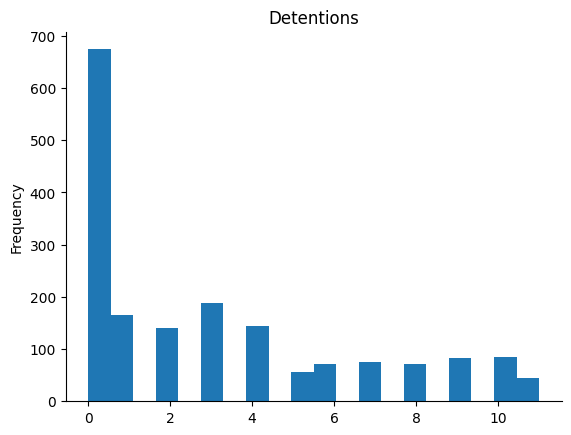

In [ ]:
# @title Detentions

from matplotlib import pyplot as plt
synthetic_data['Detentions'].plot(kind='hist', bins=20, title='Detentions')
plt.gca().spines[['top', 'right',]].set_visible(False)

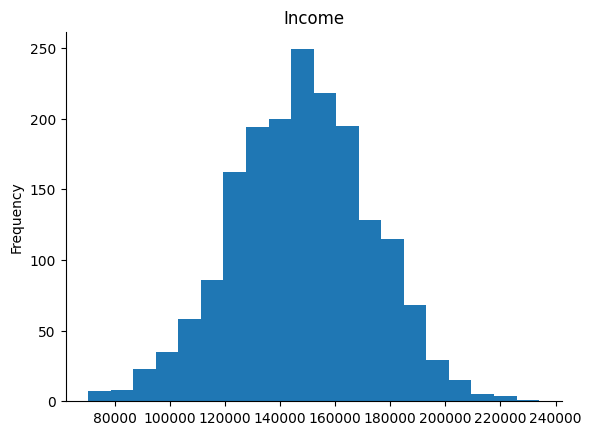

In [ ]:
# @title Income

from matplotlib import pyplot as plt
synthetic_data['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

## **Differentially Private Query Testing**

In [ ]:
!pip install python-dp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.8 MB/s eta 0:00:00


In [ ]:
import pydp as dp
import pydp.algorithms as dp_algorithms
from pydp.algorithms.laplacian import BoundedMean

### **Testing Different Values of Epsilon to estimate Error**

#### **Testing error for calculating yearly grade averages.**

In [ ]:
import numpy as np

def test_epsilon_values(data, true_mean, epsilon_values, num_trials=25):
    """
    Tests different epsilon values for calculating the differentially private mean of a dataset.

    Parameters:
        data (list of float): The data to perform DP operations on.
        true_mean (float): The actual mean of the data, for error calculation.
        epsilon_values (list of float): List of epsilon values to test.
        num_trials (int): Number of trials to run for each epsilon to average out randomness.

    Returns:
        dict: A dictionary mapping each epsilon value to the average error observed.
    """
    results = {}
    for epsilon in epsilon_values:
        errors = []
        for _ in range(num_trials):
            dp_mean_calculator = BoundedMean(epsilon=epsilon, dtype='float', lower_bound=min(data), upper_bound=max(data))
            dp_mean = dp_mean_calculator.quick_result(data)
            error = abs(dp_mean - true_mean)
            errors.append(error)
        average_error = np.mean(errors)
        results[epsilon] = average_error
    return results

# Example usage
data = [np.mean([grade for sublist in student_data for grade in sublist]) for student_data in synthetic_data['Yearly Grades']]
true_mean = np.mean(data)  # Calculate the true mean of the data
epsilon_values = [0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0]  # Epsilon values to test
errors = test_epsilon_values(data, true_mean, epsilon_values)
print(errors)


{0.01: 2.8533906841701286, 0.05: 0.5292858906375261, 0.1: 0.2515297665043943, 0.5: 0.048499440430015854, 1.0: 0.03142268398896135, 2.0: 0.018994884999403324, 5.0: 0.008196110607358378}


Looks like epsilon 0.05 gives acceptable error at 0.529 grade points, out of 100. We'll increase to 0.1 or 0.2 if we expect the result to be smaller group.

#### **Testing error for calculating income averages.**

In [ ]:
import numpy as np

def test_epsilon_values(data, true_mean, epsilon_values, num_trials=25):
    """
    Tests different epsilon values for calculating the differentially private mean of a dataset.

    Parameters:
        data (list of float): The data to perform DP operations on.
        true_mean (float): The actual mean of the data, for error calculation.
        epsilon_values (list of float): List of epsilon values to test.
        num_trials (int): Number of trials to run for each epsilon to average out randomness.

    Returns:
        dict: A dictionary mapping each epsilon value to the average error observed.
    """
    results = {}
    for epsilon in epsilon_values:
        errors = []
        for _ in range(num_trials):
            dp_mean_calculator = BoundedMean(epsilon=epsilon, dtype='float', lower_bound=min(data), upper_bound=max(data))
            dp_mean = dp_mean_calculator.quick_result(data)
            error = abs(dp_mean - true_mean)
            errors.append(error)
        average_error = np.mean(errors)
        results[epsilon] = average_error
    return results

# Example usage
data = synthetic_data['Income']
true_mean = np.mean(data)  # Calculate the true mean of the data
epsilon_values = [0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0]  # Epsilon values to test
errors = test_epsilon_values(data, true_mean, epsilon_values)
print(errors)


{0.01: 5339.7377033371995, 0.05: 1441.7332876788714, 0.1: 698.2450806281448, 0.5: 203.5949393794482, 1.0: 87.1720264635532, 2.0: 25.107776315009104, 5.0: 17.854635924687027}


Looks like epsilon = 0.05 gives an acceptable average error for income, at about 1300! We'll increase to .1 or .2 if we do queries on smaller groups.

#### **Testing error for calculating counts of students of a certain race**

In [ ]:
import numpy as np
from pydp.algorithms.laplacian import Count

def test_epsilon_values_for_race_count(data, race, true_count, epsilon_values, num_trials=25):
    """
    Tests different epsilon values for calculating the differentially private count of students of a specific race.

    Parameters:
        data (list of str): The race data for each student.
        race (str): The target race to count.
        true_count (int): The actual count of students of the target race, for error calculation.
        epsilon_values (list of float): List of epsilon values to test.
        num_trials (int): Number of trials to run for each epsilon to average out randomness.

    Returns:
        dict: A dictionary mapping each epsilon value to the average error observed.
    """
    results = {}
    for epsilon in epsilon_values:
        errors = []
        for _ in range(num_trials):
            dp_counter = Count(epsilon=epsilon)  # Initialize the differential privacy count mechanism
            # Count the occurrences of the specified race
            for student_race in data:
                if student_race == race:
                    dp_counter.add_entry(1)
            dp_count = dp_counter.result()
            error = abs(dp_count - true_count)
            errors.append(error)
        average_error = np.mean(errors)
        results[epsilon] = average_error
    return results

# Assuming 'synthetic_data' is a list of race categories for each student
race_data = synthetic_data['Race']  # Adjust this to the actual structure of your data
target_race = "White"
true_count = race_data[race_data == target_race].count()  # Calculate the actual count

# Epsilon values to test
epsilon_values = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]

# Test different epsilon values
errors = test_epsilon_values_for_race_count(race_data, target_race, true_count, epsilon_values)
print(errors)


{0.01: 141.92, 0.1: 8.28, 0.5: 2.44, 1.0: 1.24, 2.0: 0.32, 5.0: 0.08}


**Conclusion:** An epsilon of 0.1 gives us acceptable error of 8.28 students.

#### **Conclusions of Epsilon Testing**

From our exploration, we've decided that using an epsilon of 0.1 for group counting tasks and 0.05 for group averages should give us results where the average error of a query is acceptable.


# **Analytics Queries**

For this hypothetial scenario, we imagine that we have an analyst who is limited to a certain total budget across the dataset - we choose the total budget ϵ = 2 as it still provides good privacy guarantees while allowing for a number of analytical queries to be run with low error.

The queries are as follows:

1. Average income of students that have been suspended
2. Count of the races of students with detentions
3. Average distance from school by income quartile
4. Count of yearly grades in the C range (70-79)
5. Count of failing yearly grades under a 70 that are more than 15km away.



From our initial testing, it seems like ϵ = .2 should yield an acceptable amount of error for each of these queries, although we expect those returning a larger group to have less relative error.

## **Query Results**


### **Average income of students that have been suspended**


In [ ]:
# Assume 'synthetic_data' DataFrame is already loaded with your specified format
# Filter to include only students who have been suspended at least once
suspended_students = synthetic_data[synthetic_data['Suspensions'] > 0]

# Extract the 'Income' column from these filtered results
incomes = suspended_students['Income'].tolist()

# Dynamically determine the minimum and maximum income for better accuracy
lower_bound = min(incomes) if incomes else 0  # Set to 0 if list is empty
upper_bound = max(incomes) if incomes else 0  # Set to 0 if list is empty

# Set the privacy parameter epsilon
epsilon = .2  # Smaller values are more private

# Initialize the BoundedMean algorithm with dynamically calculated bounds
bounded_mean = BoundedMean(epsilon=epsilon, dtype='float', lower_bound=lower_bound, upper_bound=upper_bound)

# Compute the differentially private mean income
dp_mean = bounded_mean.quick_result(incomes) if incomes else 0  # Handle empty list scenario

# Print the differentially private mean income of students suspended at least once
print(f"Differentially Private Mean Income of Suspended Students: {dp_mean}")

Differentially Private Mean Income of Suspended Students: 122608.78017956883


### **Counts of detentions, by race**


In [ ]:
from pydp.algorithms.laplacian import BoundedSum

# Group by 'Race' and sum 'Detentions' for each group
race_detentions = synthetic_data.groupby('Race')['Detentions'].apply(list).reset_index()

# Define the privacy parameter epsilon
epsilon = .2

# Create a list to store the differentially private sums
dp_sums = []

# Calculate differentially private sum of detentions for each race
for index, row in race_detentions.iterrows():
    # Initialize the BoundedSum algorithm with appropriate bounds
    upper_bound = int(synthetic_data['Detentions'].quantile(0.99))
    dp_sum = BoundedSum(epsilon, lower_bound=0, upper_bound=upper_bound)

    # Add each detention count for the race
    for detention in row['Detentions']:
        dp_sum.add_entry(detention)

    # Compute the differentially private sum
    private_sum = dp_sum.result()

    # Store the result with the corresponding race
    dp_sums.append((row['Race'], private_sum))

    # Debugging statement to display the differentially private sum
    # print(f"Differentially Private Sum of Detentions for race {row['Race']}: {private_sum}")
    # # Debugging statement to display the actual sum
    # print(f"Actual sum of detentions for race {row['Race']}: {sum(row['Detentions'])}")

# Print the differentially private sums of detentions for each race
for race, sum_detentions in dp_sums:
    print(f"Race: {race}, Differentially Private Sum of Detentions: {sum_detentions}")




Race: American Indian or Alaska Native, Differentially Private Sum of Detentions: 79
Race: Asian, Differentially Private Sum of Detentions: 143
Race: Black or African American, Differentially Private Sum of Detentions: -176
Race: Native Hawaiian or Other Pacific Islander, Differentially Private Sum of Detentions: 323
Race: Two Or More Races, Differentially Private Sum of Detentions: 878
Race: White, Differentially Private Sum of Detentions: 4022


### **Average distance from school by income quartile**


In [ ]:
import pandas as pd
from pydp.algorithms.laplacian import BoundedMean

# Assuming epsilon and bounds are appropriately chosen
epsilon = .2
lower_bound = synthetic_data['Distance from School'].min()
upper_bound = synthetic_data['Distance from School'].max()

# Calculate quartiles for 'Income'
synthetic_data['Income Quartile'] = pd.qcut(synthetic_data['Income'], 4, labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'])

# Create a BoundedMean object for each quartile
dp_means = {quartile: BoundedMean(epsilon=epsilon, dtype='float', lower_bound=lower_bound, upper_bound=upper_bound) for quartile in ['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']}

# Initialize a dictionary to store actual means for comparison
actual_means = {}

# Add distances to each quartile's BoundedMean object and calculate actual means
for quartile in ['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']:
    quartile_data = synthetic_data[synthetic_data['Income Quartile'] == quartile]['Distance from School']
    actual_mean = quartile_data.mean()
    actual_means[quartile] = actual_mean

    for distance in quartile_data:
        dp_means[quartile].add_entry(distance)

# Calculate differentially private means
dp_average_distances = {quartile: dp_means[quartile].result() for quartile in dp_means}

# Print the differentially private average distances for each quartile and compare with actual means
for quartile in dp_means:
    print(f"{quartile} - Actual Mean Distance: {actual_means[quartile]:.2f}, Differentially Private Mean Distance: {dp_average_distances[quartile]:.2f}")


1st Quartile - Actual Mean Distance: 10.70, Differentially Private Mean Distance: 10.67
2nd Quartile - Actual Mean Distance: 10.00, Differentially Private Mean Distance: 9.97
3rd Quartile - Actual Mean Distance: 10.27, Differentially Private Mean Distance: 10.39
4th Quartile - Actual Mean Distance: 10.47, Differentially Private Mean Distance: 10.43


### **Count of students in 70-79 (C) grade range**


In [ ]:
import pandas as pd
import pydp as dp
from pydp.algorithms.laplacian import Count

# Step 1: Calculate the average yearly grade for each student
synthetic_data['Average Grade'] = synthetic_data['Yearly Grades'].apply(
    lambda grades: pd.Series([sum(year) / len(year) for year in grades if year]).mean()
)

# Step 2: Filter students whose average grade is in the C range
c_range_students = synthetic_data[
    (synthetic_data['Average Grade'] >= 70) & (synthetic_data['Average Grade'] < 80)
]

# Actual count of students with C range grades
actual_count = len(c_range_students)

# Step 3: Apply differential privacy to count the students
epsilon = .2  # Privacy parameter, adjust as needed
dp_count = Count(epsilon)
dp_count.add_entries([1] * len(c_range_students))  # Add a '1' for each student in the C range
private_count = dp_count.result()

print(f"Actual Count of Students with C Range Grades: {actual_count}")
print(f"Differentially Private Count of Students with C Range Grades: {private_count}")


Actual Count of Students with C Range Grades: 442
Differentially Private Count of Students with C Range Grades: 425


### **Average distance from school for students who have taken both choir and orchestra**

In [ ]:
import pandas as pd
import pydp as dp
from pydp.algorithms.laplacian import BoundedMean

# Assuming 'synthetic_data' has columns 'Class Lists' and 'Distance from School'

# Step 1: Filter students who have taken both Choir and Orchestra in any year
students_with_both = synthetic_data[
    synthetic_data['Class Lists'].apply(lambda class_lists: any('Choir' in classes and 'Orchestra' in classes for classes in class_lists))
]

# Step 3: Apply differential privacy to calculate the average distance
epsilon = .2  # Privacy parameter
lower_bound = synthetic_data['Distance from School'].min()  # Minimum distance from school in the data
upper_bound = synthetic_data['Distance from School'].max()  # Maximum distance from school in the data

dp_mean = BoundedMean(epsilon = epsilon, lower_bound = lower_bound, upper_bound = upper_bound, dtype="float")

# Adding entries to the DP mean calculation
for distance in students_with_both['Distance from School']:
    dp_mean.add_entry(distance)

dp_average_distance = dp_mean.result()
print(f"Differentially Private Average Distance: {dp_average_distance}")


Differentially Private Average Distance: 10.564378485705163


## **Plotted Runtime analysis**

In [ ]:
!pip install numpy matplotlib
import time
import numpy as np
import matplotlib.pyplot as plt

### **Runtime analysis: average income of students that have been suspended**


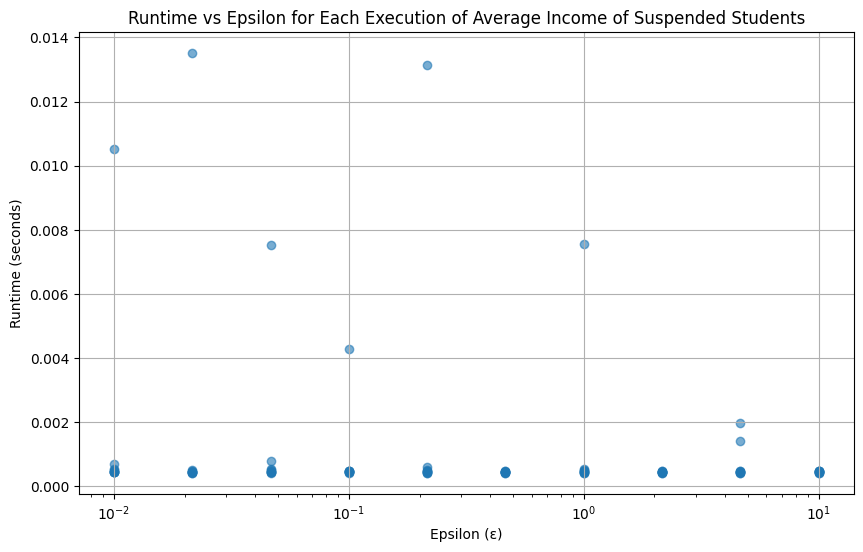

In [66]:
# Define the range of epsilon values to test
epsilon_values = np.logspace(-2, 1, 10)  # Generates 10 values from 10^-2 to 10^1

# Assume 'synthetic_data' DataFrame is already loaded with your specified format
# Filter to include only students who have been suspended at least once
suspended_students = synthetic_data[synthetic_data['Suspensions'] > 0]

# Extract the 'Income' column from these filtered results
incomes = suspended_students['Income'].tolist()

# Dynamically determine the minimum and maximum income for better accuracy
lower_bound = min(incomes) if incomes else 0  # Set to 0 if list is empty
upper_bound = max(incomes) if incomes else 0  # Set to 0 if list is empty

# Number of executions per epsilon value
executions_per_epsilon = 10

# Holder for runtimes
all_runtimes = []

# Function to simulate the differentially private query (replace this with your actual function)
def differentially_private_query(epsilon):
    # Start time
    start_time = time.time()

    # Initialize the BoundedMean algorithm with dynamically calculated bounds
    bounded_mean = BoundedMean(epsilon=epsilon, dtype='float', lower_bound=lower_bound, upper_bound=upper_bound)

    # Compute the differentially private mean income
    dp_mean = bounded_mean.quick_result(incomes) if incomes else 0  # Handle empty list scenario

    # End time
    end_time = time.time()

    # Return runtime
    return end_time - start_time

# Test each epsilon value
for epsilon in epsilon_values:
    runtimes = []
    for _ in range(executions_per_epsilon):
        runtime = differentially_private_query(epsilon)
        runtimes.append(runtime)
        all_runtimes.append((epsilon, runtime))  # Store epsilon and runtime

# Unpack epsilon and runtime into separate lists for plotting
epsilons, runtimes = zip(*all_runtimes)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(epsilons, runtimes, alpha=0.6)  # Use scatter to plot individual points
plt.title('Runtime vs Epsilon for Each Execution of Average Income of Suspended Students')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
plt.grid(True)
plt.show()

### **Runtime analysis: counts of detentions, by race**


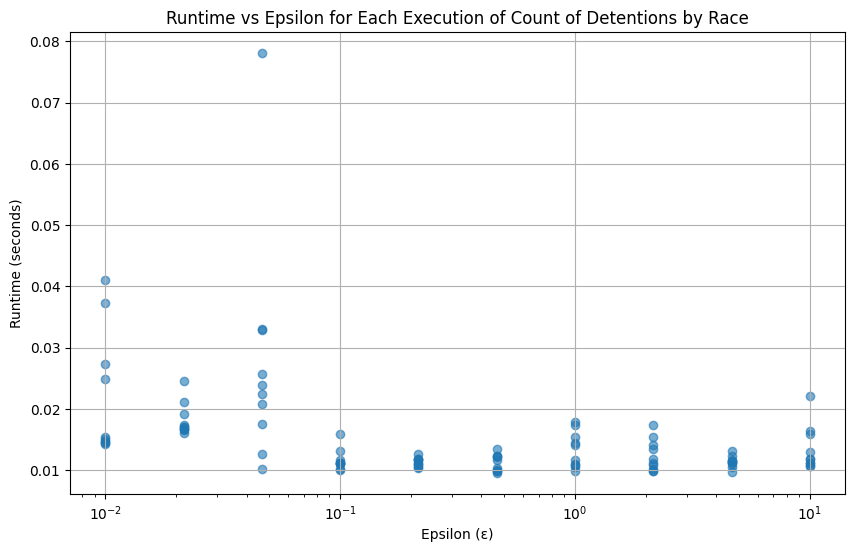

In [65]:
from pydp.algorithms.laplacian import BoundedSum

# Define the range of epsilon values to test
epsilon_values = np.logspace(-2, 1, 10)  # Generates 10 values from 10^-2 to 10^1

race_detentions = synthetic_data.groupby('Race')['Detentions'].apply(list).reset_index()

# Number of executions per epsilon value
executions_per_epsilon = 10

# Holder for runtimes
all_runtimes = []

# Function to simulate the differentially private query (replace this with your actual function)
def differentially_private_query(epsilon):
    # Start time
    start_time = time.time()

    dp_sums = []

    # Calculate differentially private sum of detentions for each race
    for index, row in race_detentions.iterrows():
        # Initialize the BoundedSum algorithm with appropriate bounds
        upper_bound = int(synthetic_data['Detentions'].quantile(0.99))
        dp_sum = BoundedSum(epsilon, lower_bound=0, upper_bound=upper_bound)

        # Add each detention count for the race
        for detention in row['Detentions']:
            dp_sum.add_entry(detention)

        # Compute the differentially private sum
        private_sum = dp_sum.result()

        # Store the result with the corresponding race
        dp_sums.append((row['Race'], private_sum))



    # End time
    end_time = time.time()

    # Return runtime
    return end_time - start_time

# Test each epsilon value
for epsilon in epsilon_values:
    runtimes = []
    for _ in range(executions_per_epsilon):
        runtime = differentially_private_query(epsilon)
        runtimes.append(runtime)
        all_runtimes.append((epsilon, runtime))  # Store epsilon and runtime

# Unpack epsilon and runtime into separate lists for plotting
epsilons, runtimes = zip(*all_runtimes)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(epsilons, runtimes, alpha=0.6)  # Use scatter to plot individual points
plt.title('Runtime vs Epsilon for Each Execution of Count of Detentions by Race')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
plt.grid(True)
plt.show()

### **Runtime analysis: average distance from school by income quartile**


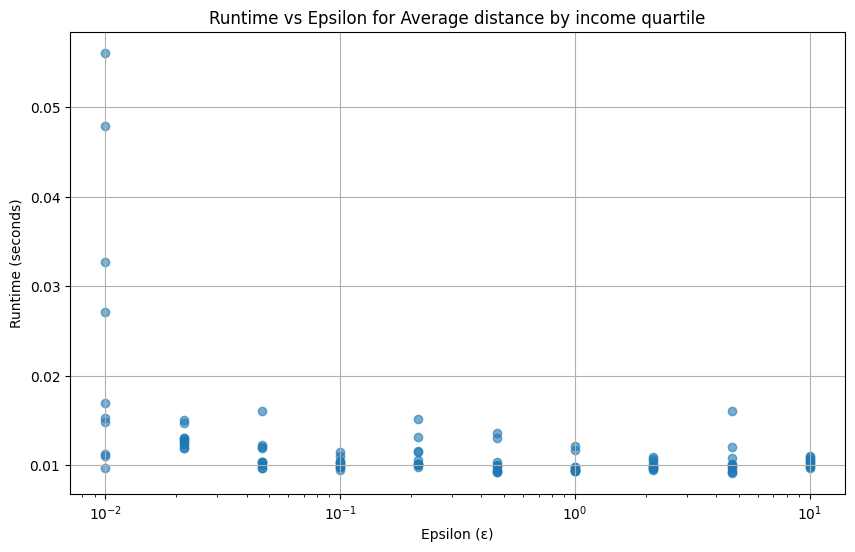

In [64]:
# Define the range of epsilon values to test
epsilon_values = np.logspace(-2, 1, 10)  # Generates 10 values from 10^-2 to 10^1

lower_bound = synthetic_data['Distance from School'].min()
upper_bound = synthetic_data['Distance from School'].max()

# Calculate quartiles for 'Income'
synthetic_data['Income Quartile'] = pd.qcut(synthetic_data['Income'], 4, labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'])

# Number of executions per epsilon value
executions_per_epsilon = 10

# Holder for runtimes
all_runtimes = []

# Function to simulate the differentially private query (replace this with your actual function)
def differentially_private_query(epsilon):
    # Start time
    start_time = time.time()


    # Create a BoundedMean object for each quartile
    dp_means = {quartile: BoundedMean(epsilon=epsilon, dtype='float', lower_bound=lower_bound, upper_bound=upper_bound) for quartile in ['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']}

    # Initialize a dictionary to store actual means for comparison
    actual_means = {}

    # Add distances to each quartile's BoundedMean object and calculate actual means
    for quartile in ['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']:
        quartile_data = synthetic_data[synthetic_data['Income Quartile'] == quartile]['Distance from School']
        actual_mean = quartile_data.mean()
        actual_means[quartile] = actual_mean

        for distance in quartile_data:
            dp_means[quartile].add_entry(distance)

    # Calculate differentially private means
    dp_average_distances = {quartile: dp_means[quartile].result() for quartile in dp_means}



    # End time
    end_time = time.time()

    # Return runtime
    return end_time - start_time

# Test each epsilon value
for epsilon in epsilon_values:
    runtimes = []
    for _ in range(executions_per_epsilon):
        runtime = differentially_private_query(epsilon)
        runtimes.append(runtime)
        all_runtimes.append((epsilon, runtime))  # Store epsilon and runtime

# Unpack epsilon and runtime into separate lists for plotting
epsilons, runtimes = zip(*all_runtimes)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(epsilons, runtimes, alpha=0.6)  # Use scatter to plot individual points
plt.title('Runtime vs Epsilon for Average distance by income quartile')
plt.xlabel('Epsilon (ε)')
plt.xscale('log')
plt.ylabel('Runtime (seconds)')
plt.grid(True)
plt.show()

### **Runtime analysis: Count of Students in C-range**



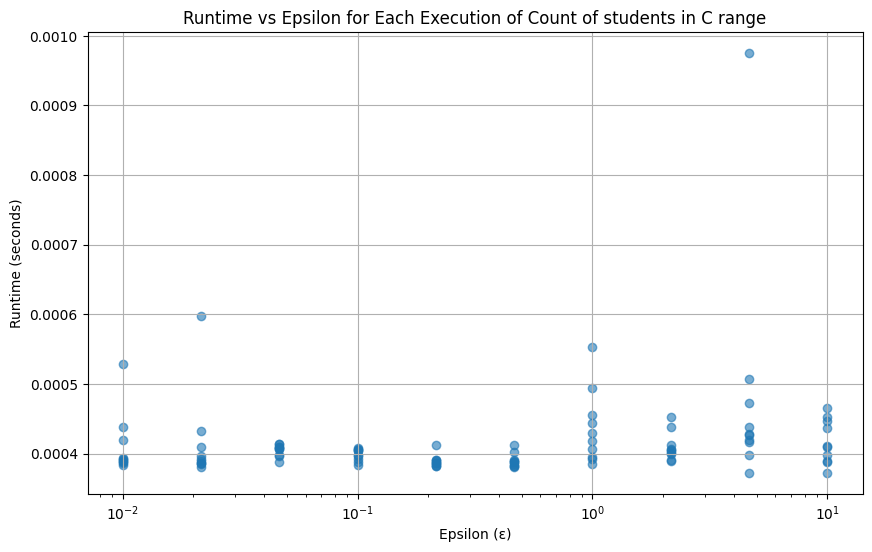

In [62]:
# Define the range of epsilon values to test
epsilon_values = np.logspace(-2, 1, 10)  # Generates 10 values from 10^-2 to 10^1

from pydp.algorithms.laplacian import Count

# Step 1: Calculate the average yearly grade for each student
synthetic_data['Average Grade'] = synthetic_data['Yearly Grades'].apply(
    lambda grades: pd.Series([sum(year) / len(year) for year in grades if year]).mean()
)

# Step 2: Filter students whose average grade is in the C range
c_range_students = synthetic_data[
    (synthetic_data['Average Grade'] >= 70) & (synthetic_data['Average Grade'] < 80)
]

# Actual count of students with C range grades
actual_count = len(c_range_students)

# Number of executions per epsilon value
executions_per_epsilon = 10

# Holder for runtimes
all_runtimes = []

# Function to simulate the differentially private query (replace this with your actual function)
def differentially_private_query(epsilon):
    # Start time
    start_time = time.time()

    dp_count = Count(epsilon)
    dp_count.add_entries([1] * len(c_range_students))  # Add a '1' for each student in the C range
    private_count = dp_count.result()

    # End time
    end_time = time.time()

    # Return runtime
    return end_time - start_time

# Test each epsilon value
for epsilon in epsilon_values:
    runtimes = []
    for _ in range(executions_per_epsilon):
        runtime = differentially_private_query(epsilon)
        runtimes.append(runtime)
        all_runtimes.append((epsilon, runtime))  # Store epsilon and runtime

# Unpack epsilon and runtime into separate lists for plotting
epsilons, runtimes = zip(*all_runtimes)

# Plotting
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.scatter(epsilons, runtimes, alpha=0.6)  # Use scatter to plot individual points
plt.title('Runtime vs Epsilon for Each Execution of Count of students in C range')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Runtime (seconds)')
plt.grid(True)
plt.show()

### **Runtime analysis: average distance of students who have taken choir and orchestra**


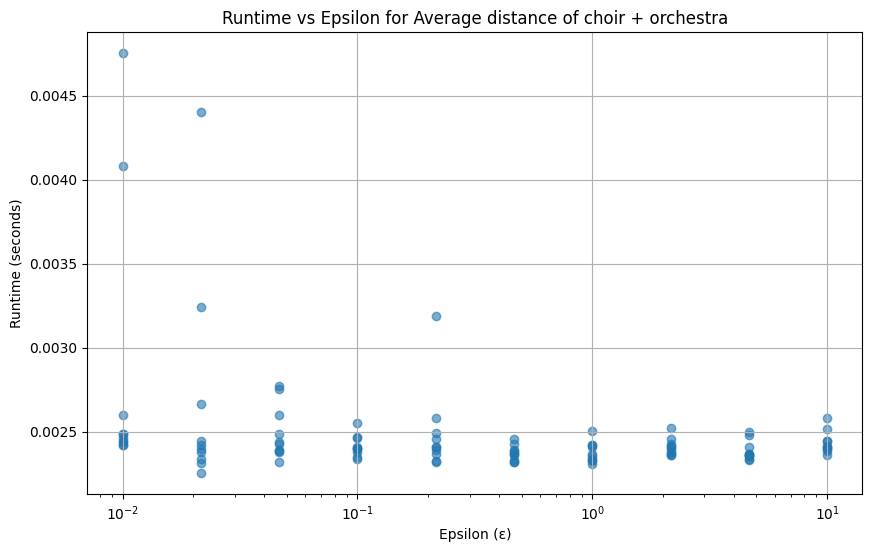

In [60]:
# Define the range of epsilon values to test
epsilon_values = np.logspace(-2, 1, 10)  # Generates 10 values from 10^-2 to 10^1

students_with_both = synthetic_data[
    synthetic_data['Class Lists'].apply(lambda class_lists: any('Choir' in classes and 'Orchestra' in classes for classes in class_lists))
]

# Number of executions per epsilon value
executions_per_epsilon = 10

# Holder for runtimes
all_runtimes = []

# Function to simulate the differentially private query (replace this with your actual function)
def differentially_private_query(epsilon):
    # Start time
    start_time = time.time()

    lower_bound = synthetic_data['Distance from School'].min()  # Minimum distance from school in the data
    upper_bound = synthetic_data['Distance from School'].max()  # Maximum distance from school in the data

    dp_mean = BoundedMean(epsilon = epsilon, lower_bound = lower_bound, upper_bound = upper_bound, dtype="float")

    # Adding entries to the DP mean calculation
    for distance in students_with_both['Distance from School']:
        dp_mean.add_entry(distance)

    dp_average_distance = dp_mean.result()

    # End time
    end_time = time.time()

    # Return runtime
    return end_time - start_time

# Test each epsilon value
for epsilon in epsilon_values:
    runtimes = []
    for _ in range(executions_per_epsilon):
        runtime = differentially_private_query(epsilon)
        runtimes.append(runtime)
        all_runtimes.append((epsilon, runtime))  # Store epsilon and runtime

# Unpack epsilon and runtime into separate lists for plotting
epsilons, runtimes = zip(*all_runtimes)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(epsilons, runtimes, alpha=0.6)  # Use scatter to plot individual points
plt.title('Runtime vs Epsilon for Average distance of choir + orchestra')
plt.xlabel('Epsilon (ε)')
plt.xscale('log')
plt.ylabel('Runtime (seconds)')
plt.grid(True)
plt.show()

## **Plotted Error analysis**

### **Error analysis: average income of students that have been suspended**

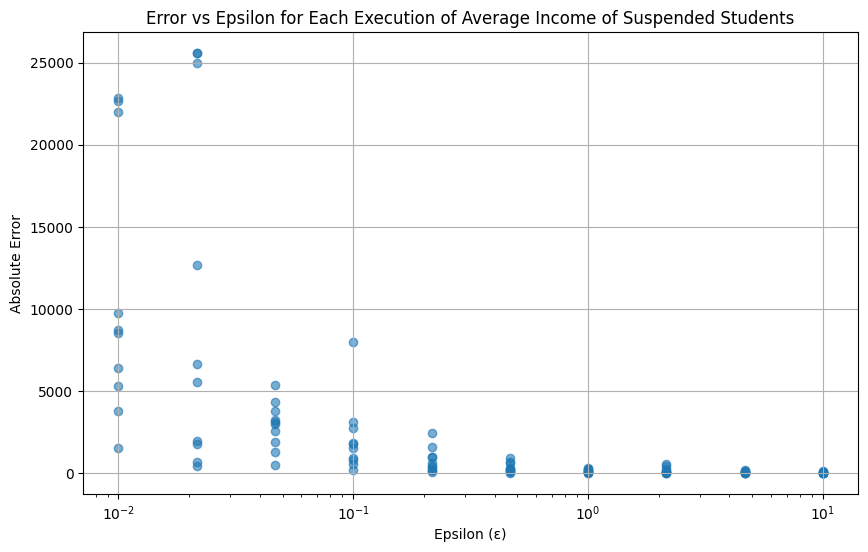

In [ ]:
import numpy as np
import time
from pydp.algorithms.laplacian import BoundedMean
import matplotlib.pyplot as plt

# Define the range of epsilon values to test
epsilon_values = np.logspace(-2, 1, 10)  # Generates 10 values from 10^-2 to 10^1

# Assume 'synthetic_data' DataFrame is already loaded
# Filter to include only students who have been suspended at least once
suspended_students = synthetic_data[synthetic_data['Suspensions'] > 0]

# Extract the 'Income' column from these filtered results
incomes = suspended_students['Income'].tolist()

# Calculate the actual mean income
actual_mean_income = np.mean(incomes) if incomes else 0

# Dynamically determine the minimum and maximum income for better accuracy
lower_bound = min(incomes) if incomes else 0  # Set to 0 if list is empty
upper_bound = max(incomes) if incomes else 0  # Set to 0 if list is empty

# Number of executions per epsilon value
executions_per_epsilon = 10

# Holder for errors
all_errors = []

# Function to simulate the differentially private query and calculate error
def differentially_private_query_and_error(epsilon):
    # Initialize the BoundedMean algorithm with dynamically calculated bounds
    bounded_mean = BoundedMean(epsilon=epsilon, dtype='float', lower_bound=lower_bound, upper_bound=upper_bound)

    # Compute the differentially private mean income
    dp_mean = bounded_mean.quick_result(incomes) if incomes else 0  # Handle empty list scenario

    # Calculate error from the actual mean
    error = abs(dp_mean - actual_mean_income)

    return error

# Test each epsilon value
for epsilon in epsilon_values:
    errors = []
    for _ in range(executions_per_epsilon):
        error = differentially_private_query_and_error(epsilon)
        errors.append(error)
        all_errors.append((epsilon, error))  # Store epsilon and error

# Unpack epsilon and error into separate lists for plotting
epsilons, errors = zip(*all_errors)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(epsilons, errors, alpha=0.6)  # Use scatter to plot individual points
plt.title('Error vs Epsilon for Each Execution of Average Income of Suspended Students')
plt.xlabel('Epsilon (ε)')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()


### **Error analysis: counting number of detentions by race**



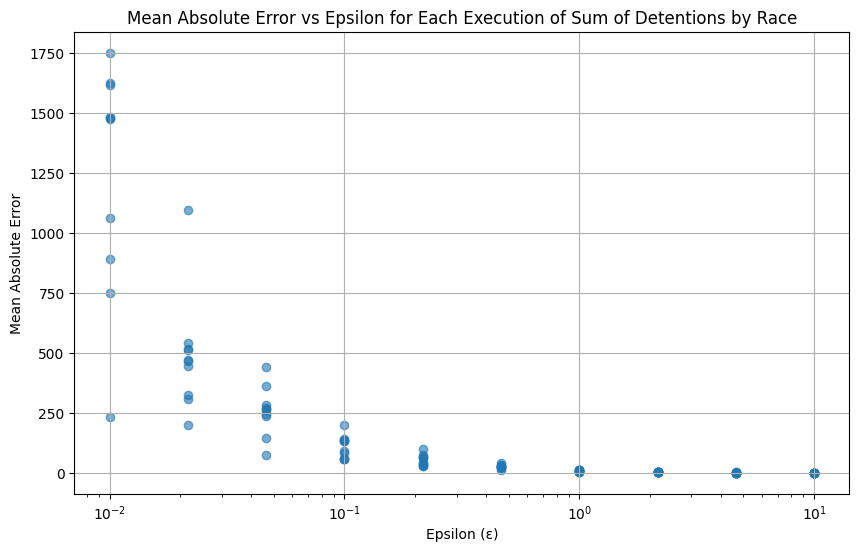

In [ ]:
import numpy as np
import time
from pydp.algorithms.laplacian import BoundedSum
import matplotlib.pyplot as plt

# Define the range of epsilon values to test
epsilon_values = np.logspace(-2, 1, 10)  # Generates 10 values from 10^-2 to 10^1

# Group detentions by race and list them
race_detentions = synthetic_data.groupby('Race')['Detentions'].apply(list).reset_index()

# Holder for errors
all_errors = []

# Function to simulate the differentially private query and calculate error
def differentially_private_query_and_error(epsilon):
    errors = []

    # Calculate differentially private sum of detentions for each race
    for index, row in race_detentions.iterrows():
        # Initialize the BoundedSum algorithm with appropriate bounds
        upper_bound = int(synthetic_data['Detentions'].quantile(0.99))  # Upper bound based on data
        dp_sum = BoundedSum(epsilon, lower_bound=0, upper_bound=upper_bound)

        # Add each detention count for the race
        for detention in row['Detentions']:
            dp_sum.add_entry(detention)

        # Compute the differentially private sum
        private_sum = dp_sum.result()

        # Calculate the actual sum
        actual_sum = sum(row['Detentions'])

        # Calculate absolute error and store it
        error = abs(private_sum - actual_sum)
        errors.append(error)

    # Average error across all races for this epsilon
    mean_error = np.mean(errors)
    return mean_error

# Test each epsilon value
for epsilon in epsilon_values:
    mean_errors = []
    for _ in range(executions_per_epsilon):
        error = differentially_private_query_and_error(epsilon)
        mean_errors.append(error)
        all_errors.append((epsilon, error))  # Store epsilon and mean error

# Unpack epsilon and mean error into separate lists for plotting
epsilons, errors = zip(*all_errors)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(epsilons, errors, alpha=0.6)  # Use scatter to plot individual points
plt.title('Mean Absolute Error vs Epsilon for Each Execution of Sum of Detentions by Race')
plt.xlabel('Epsilon (ε)')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()


### **Error analysis: distance by income quartile**


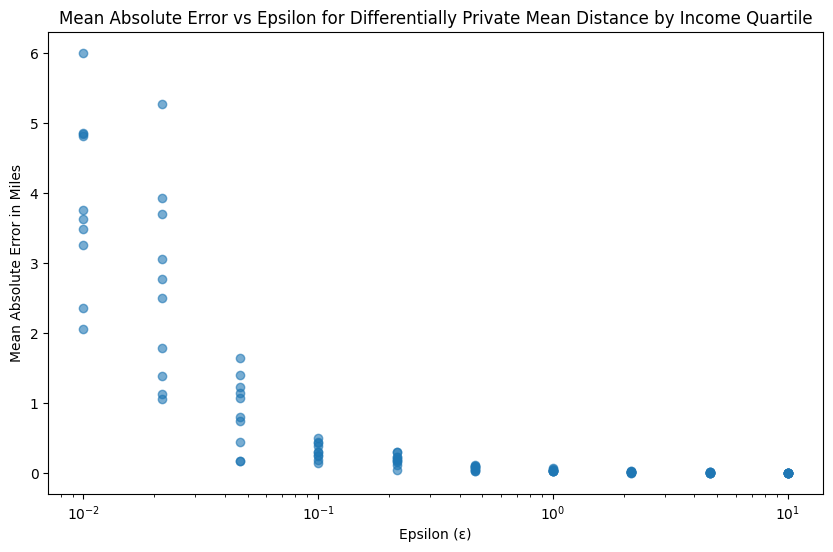

In [ ]:
import numpy as np
import pandas as pd
import time
from pydp.algorithms.laplacian import BoundedMean
import matplotlib.pyplot as plt

# Define the range of epsilon values using logspace
epsilon_values = np.logspace(-2, 1, 10)  # Generates values from 10^-2 to 10^1

lower_bound = synthetic_data['Distance from School'].min()
upper_bound = synthetic_data['Distance from School'].max()

# Calculate quartiles for 'Income'
synthetic_data['Income Quartile'] = pd.qcut(synthetic_data['Income'], 4, labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'])

# Number of executions per epsilon value
executions_per_epsilon = 10

# Holder for errors
all_errors = []

# Function to simulate the differentially private query and calculate error
def differentially_private_query_and_error(epsilon):
    # Create a BoundedMean object for each quartile
    dp_means = {quartile: BoundedMean(epsilon=epsilon, dtype='float', lower_bound=lower_bound, upper_bound=upper_bound) for quartile in ['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']}

    # Initialize a dictionary to store actual means for comparison
    actual_means = {}

    # Add distances to each quartile's BoundedMean object and calculate actual means
    for quartile in ['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']:
        quartile_data = synthetic_data[synthetic_data['Income Quartile'] == quartile]['Distance from School']
        actual_mean = quartile_data.mean()
        actual_means[quartile] = actual_mean

        for distance in quartile_data:
            dp_means[quartile].add_entry(distance)

    # Calculate differentially private means and calculate errors
    errors = []
    for quartile in dp_means:
        dp_mean = dp_means[quartile].result()
        error = abs(dp_mean - actual_means[quartile])
        errors.append(error)

    # Return the average error across quartiles
    return np.mean(errors)

# Test each epsilon value
for epsilon in epsilon_values:
    errors = []
    for _ in range(executions_per_epsilon):
        error = differentially_private_query_and_error(epsilon)
        errors.append(error)
        all_errors.append((epsilon, error))  # Store epsilon and error

# Unpack epsilon and error into separate lists for plotting
epsilons, errors = zip(*all_errors)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(epsilons, errors, alpha=0.6)  # Use scatter to plot individual points
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Mean Absolute Error vs Epsilon for Differentially Private Mean Distance by Income Quartile')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Mean Absolute Error in Miles')
plt.show()


### **Error analysis: count of students in C range**

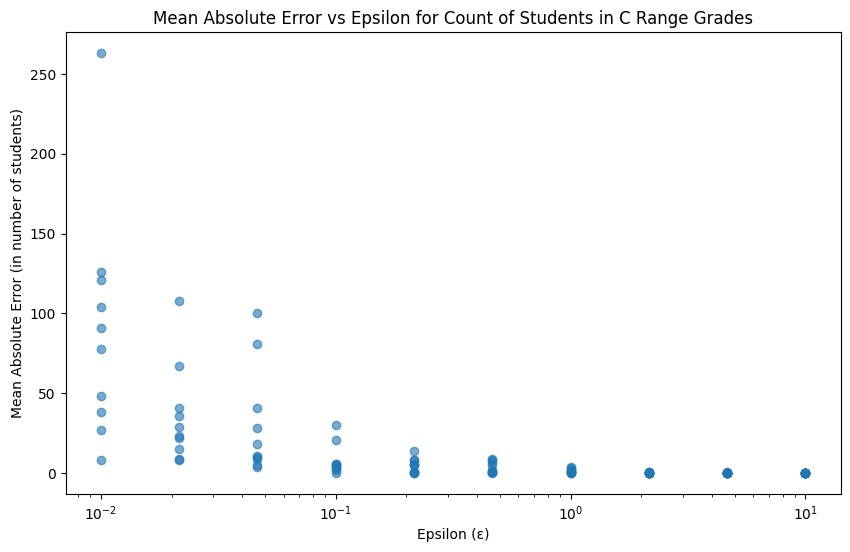

In [ ]:
import numpy as np
import pandas as pd
import time
from pydp.algorithms.laplacian import Count
import matplotlib.pyplot as plt

# Define the range of epsilon values using logspace
epsilon_values = np.logspace(-2, 1, 10)  # Generates values from 10^-2 to 10^1

# Step 1: Calculate the average yearly grade for each student
synthetic_data['Average Grade'] = synthetic_data['Yearly Grades'].apply(
    lambda grades: pd.Series([sum(year) / len(year) for year in grades if year]).mean()
)

# Step 2: Filter students whose average grade is in the C range
c_range_students = synthetic_data[
    (synthetic_data['Average Grade'] >= 70) & (synthetic_data['Average Grade'] < 80)
]

# Actual count of students with C range grades
actual_count = len(c_range_students)

# Number of executions per epsilon value
executions_per_epsilon = 10

# Holder for errors
all_errors = []

# Function to simulate the differentially private query and calculate error
def differentially_private_query_and_error(epsilon):
    dp_count = Count(epsilon)
    dp_count.add_entries([1] * len(c_range_students))  # Add a '1' for each student in the C range
    private_count = dp_count.result()

    # Calculate error
    error = abs(private_count - actual_count)
    return error

# Test each epsilon value
for epsilon in epsilon_values:
    errors = []
    for _ in range(executions_per_epsilon):
        error = differentially_private_query_and_error(epsilon)
        errors.append(error)
        all_errors.append((epsilon, error))  # Store epsilon and error

# Unpack epsilon and error into separate lists for plotting
epsilons, errors = zip(*all_errors)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(epsilons, errors, alpha=0.6)  # Use scatter to plot individual points
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Mean Absolute Error vs Epsilon for Count of Students in C Range Grades')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Mean Absolute Error (in number of students)')
plt.show()


### **Error analysis: average distance of students who have taken choir and orchestra**

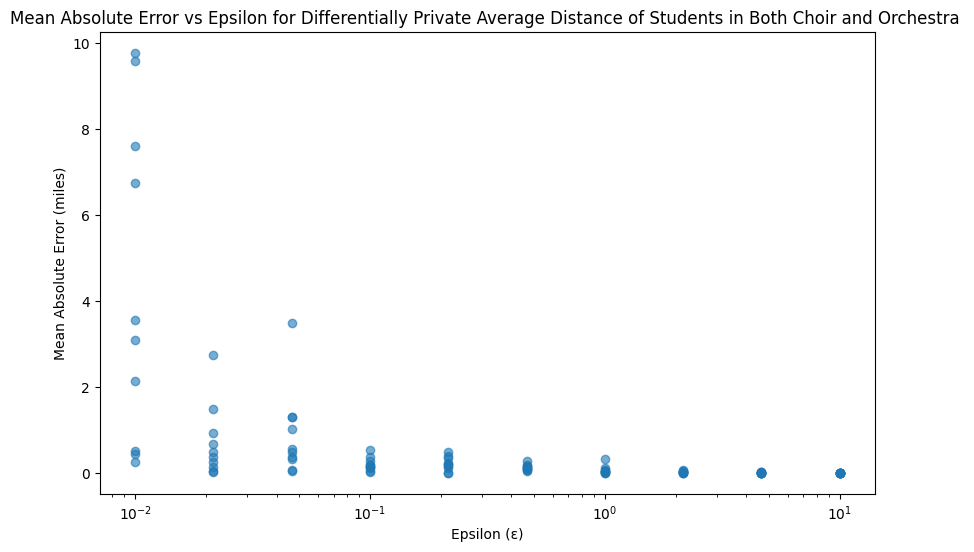

In [ ]:
# Define the range of epsilon values using logspace
epsilon_values = np.logspace(-2, 1, 10)  # Generates values from 10^-2 to 10^1

students_with_both = synthetic_data[
    synthetic_data['Class Lists'].apply(lambda class_lists: any('Choir' in classes and 'Orchestra' in classes for classes in class_lists))
]

# Actual average distance for comparison
actual_average_distance = students_with_both['Distance from School'].mean()

# Number of executions per epsilon value
executions_per_epsilon = 10

# Holder for errors
all_errors = []

# Function to simulate the differentially private query and calculate error
def differentially_private_query_and_error(epsilon):
    lower_bound = synthetic_data['Distance from School'].min()  # Minimum distance from school in the data
    upper_bound = synthetic_data['Distance from School'].max()  # Maximum distance from school in the data

    dp_mean = BoundedMean(epsilon=epsilon, lower_bound=lower_bound, upper_bound=upper_bound, dtype="float")

    # Adding entries to the DP mean calculation
    for distance in students_with_both['Distance from School']:
        dp_mean.add_entry(distance)

    dp_average_distance = dp_mean.result()

    # Calculate absolute error
    error = abs(dp_average_distance - actual_average_distance)
    return error

# Test each epsilon value
for epsilon in epsilon_values:
    errors = []
    for _ in range(executions_per_epsilon):
        error = differentially_private_query_and_error(epsilon)
        errors.append(error)
        all_errors.append((epsilon, error))  # Store epsilon and error

# Unpack epsilon and error into separate lists for plotting
epsilons, errors = zip(*all_errors)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(epsilons, errors, alpha=0.6)  # Use scatter to plot individual points
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Mean Absolute Error vs Epsilon for Differentially Private Average Distance of Students in Both Choir and Orchestra ')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Mean Absolute Error (miles)')
plt.show()